In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

# Q1. 
**연령대별 허리둘레에 대한 기술통계를 구하려고 합니다. 다음 제공되는 딕셔너리를 통해 연령대코드(5세단위)를 "연령대"로 만들고 아래와 같은 기술통계값을 구해주세요!**

In [2]:
# 주어진 딕셔너리
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

데이터를 미리보자

In [3]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,25.0,3.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,10.0,1.0,0.0,1,NaN,NaN,NaN,NaN,1.0,20181126
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,136.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,30.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,68.0,3.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126


칼럼명을 살펴보자.

In [10]:
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')

연령대코드 칼럼의 카테고리 종류가 어떻게 있나 보자.

In [7]:
df["연령대코드(5세단위)"].unique()

array([13,  8, 12,  6, 17, 10,  9, 15,  5, 11,  7, 14, 16, 18],
      dtype=int64)

5부터 시작하여 18까지 있고 1-4값은 없는 것을 알 수 있다. (왜 출력예시가 0세가 아닌 20세부터임을 이해할 수 있다.)

연령대코드 칼럼을 주어진 딕셔너리를 이용하여 변환해보자.

In [37]:
# 연령대 코드 칼럼을 col 변수에 담고
col = df["연령대코드(5세단위)"].copy()
col

0         13
1          8
2          8
3         12
4          8
          ..
999995     9
999996     9
999997    12
999998    11
999999     9
Name: 연령대코드(5세단위), Length: 1000000, dtype: int64

In [38]:
# 딕셔너리 key값을 리스트로 변환해서 key 변수에 담는다.
key = list(age_code.keys())
key

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [39]:
# 조건문과 반복문으로 변환하고

for i in range(1000000):
    for j in range(18):
        if col[i] == key[j]:
            col[i] = age_code[j]

In [33]:
# 확인한다.
col

0         55~59세
1         30~34세
2         30~34세
3         50~54세
4         30~34세
           ...  
999995    35~39세
999996    35~39세
999997    50~54세
999998    45~49세
999999    35~39세
Name: 연령대코드(5세단위), Length: 1000000, dtype: object

In [129]:
# 컬럼을 추가하자

df["연령대"] = col
df["연령대"]

0         55~59세
1         30~34세
2         30~34세
3         50~54세
4         30~34세
           ...  
999995    35~39세
999996    35~39세
999997    50~54세
999998    45~49세
999999    35~39세
Name: 연령대, Length: 1000000, dtype: object

In [131]:
# 잘 추가되었나 컬럼을 확인해보자
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자', '흡연', '음주', '연령대'],
      dtype='object')

피봇테이블을 이용하여 연령대에 따른 허리둘레 데이터의 기술통계값을 보자.

In [49]:
pd.pivot_table(df, index="연령대", values="허리둘레", aggfunc="describe")

,25%,50%,75%,count,max,mean,min,std
연령대,,,,,,,,
15~19세,67.5,73.4,81.0,23244.0,999.0,75.152220,47.5,12.251781
20~24세,69.0,76.5,84.2,64898.0,999.0,77.704783,48.0,16.735734
25~29세,72.0,80.1,88.0,77517.0,999.0,81.089268,49.0,22.988111
30~34세,75.0,82.0,89.0,84621.0,999.0,82.094012,9.2,14.522095
35~39세,73.0,80.0,87.0,130912.0,999.0,80.488308,42.1,10.803098
40~44세,74.0,81.0,87.0,118357.0,137.0,80.822449,40.0,9.521622
45~49세,75.0,81.0,87.0,129833.0,142.0,81.062754,6.5,9.095438
50~54세,76.0,82.0,87.5,112175.0,139.0,81.799905,32.0,8.730398
55~59세,77.0,83.0,88.0,106491.0,137.0,82.722769,0.0,8.596176


# Q2
**"음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"에 대한 상관계수를 구하고 시각화 해주세요.**
* 다음의 결과가 나오도록 합니다. 이 때 그래프의 색상, 스타일 표현방식에 차이가 있더라도 상관계수값이 차이가 없다면 문제 없습니다.
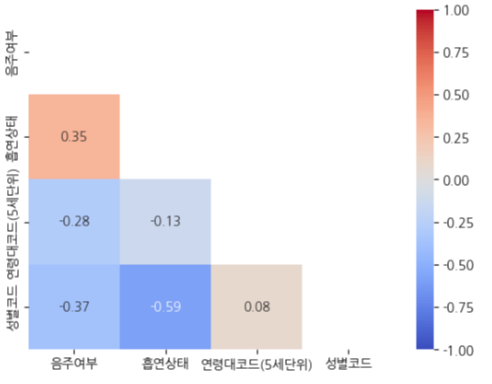

상관계수에 사용할 컬럼을 변수에 담자.

In [54]:
columns = ["음주여부", "흡연상태", "연령대코드(5세단위)", "성별코드"]
columns

['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드']

해당 컬럼만 가져오고 상관계수를 구해서 df_corr 변수에 담자.

In [56]:
df_corr = df[columns].corr()
df_corr

,음주여부,흡연상태,연령대코드(5세단위),성별코드
음주여부,1.000000,0.352014,-0.283296,-0.368630
흡연상태,0.352014,1.000000,-0.125714,-0.588491
연령대코드(5세단위),-0.283296,-0.125714,1.000000,0.080093
성별코드,-0.368630,-0.588491,0.080093,1.000000


heatmap으로 시각화하자

<AxesSubplot:>

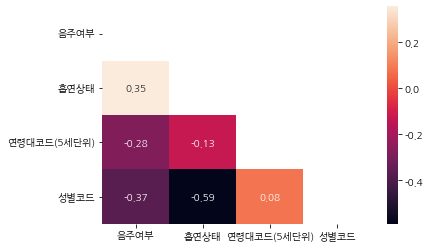

In [58]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))  # 반쪽만 보이기

sns.heatmap(df_corr, annot=True, fmt='.2f', mask=mask)

**음주와 흡연 모두 성별과 상관관계가 가장 높은 것이 흥미로웠다.  
흡연과 연령의 상관관계가 적은 것도 예상치 못한 결과였다.  
음주와 흡연은 더 높은 양의 상관관계인줄 예상했는데 그렇지 않았다.**

# Q3.
**흡연하는 사람과 음주하는 사람들의 수는 얼마나 차이가 있을까요?**
* 건강보험에서 제공하고 있는 데이터는 용량을 줄이기 위해 대부분의 데이터를 숫자 형태로 제공하고 있습니다. replace 기능을 사용하면 딕셔너리의 값을 의미하는 문자 형태로 변경해 볼 수 있습니다. 다음 제공되는 딕셔너리 값을 사용하여 숫자가 의미하는 문자 형태로 변경한 뒤 전체 데이터에서 음주와 흡연에 대한 교차 테이블을 구해 각 해당 빈도수를 구하고 시각화 해주세요!
* groupby, pivot_table로 구할 수도 있지만, 수업에서는 다루지 않았던 pandas의 crosstab 기능을 사용해서도 비교적 쉽게 구할 수 있습니다.
* crosstab 을 사용할 때는 다음의 문서를 참고하여 구해보세요. pandas.crosstab — pandas documentation
* 그리고 막대그래프를 통해 결과를 시각화해주세요! 시각화를 할 때 그래프의 스타일이나 막대의 색상 등이 달라도 상관 없으니 사용하고 싶은 스타일을 적용해서 시각화해도 좋습니다.

**예측: 아마도 흡연자 중에 음주자가 더 많을 것이다.** 

In [59]:
# 흡연 1(피우지 않는다), 2(이전에 피웠으나 끊었다), 3(현재도 피우고 있다)
# 음주 0(마시지 않은다), 1(마신다)
smoke = {1 : "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# df["흡연"]
# df["음주"]

replace 메서드를 이용하여 흡연과 음주 컬럼의 값들을 문자형태로 바꾼 칼럼을 추가하자

In [132]:
# 우선 바꾼 컬럼들을 df_re변수에 저장하자
df_re = df.replace({"흡연상태": smoke, "음주여부": drink})
df_re[["흡연상태", "음주여부"]].head()

,흡연상태,음주여부
0,흡연중,안마심
1,흡연안함,안마심
2,흡연안함,안마심
3,흡연안함,마심
4,흡연중,안마심


In [133]:
# df에 "흡연", "음주" 컬럼을 추가하자

df["흡연"] = df_re["흡연상태"]
df["음주"] = df_re["음주여부"]
df[["흡연", "음주"]].head()

,흡연,음주
0,흡연중,안마심
1,흡연안함,안마심
2,흡연안함,안마심
3,흡연안함,마심
4,흡연중,안마심


crosstab 기능을 이용하여 교차 테이블을 구하자

In [81]:
pd.crosstab(df["음주"], df["흡연"], rownames=["음주"], colnames=["흡연"])

흡연,끊음,흡연안함,흡연중
음주,,,
마심,120779,213743,162166
안마심,55334,394503,52845


막대그래프로 시각화해보자

<AxesSubplot:xlabel='흡연', ylabel='count'>

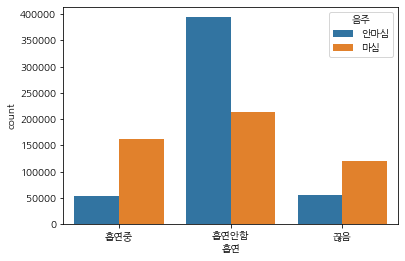

In [82]:
sns.countplot(data=df, x="흡연", hue="음주")

**흡연과 음주 모두 안하는 사람의 수가 제일 높았다.  
예상대로 흡연중인 사람은 음주를 하는 비중이 높았다.  
흡연 경험이 있으면 음주를 하는 사람 비중이 높다. 흡연 경험이 없는 경우와 완전히 상반된 결과라 흥미롭다.**

# Q4.
**체중이 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요!**
* 체중이 120Kg 이 넘는다면 비만으로 건강관리가 필요합니다. 120Kg 이상인 데이터를 찾아 "총콜레스테롤", "감마지티피" 값을 음주여부에 따라 산점도로 시각화해주세요! (이때 120Kg 도 포함되게 구합니다.) 그래프의 설정과 seaborn 버전에 따라 여백이나 회귀선의 시작과 끝점에 차이가 있을 수 있습니다.

**예상: 감마지티피는 간에 쌓인 안좋은 물질이다. 음주를 하는 사람이 이 수치가 높을 것이라 예상한다. 체중이 무거운 사람들 대상이므로 총콜레스테롤 수치는 기본적으로 높다고 예상하는데 그 중에서도 음주를 하는 집단이 더 높을 것 같다.**

우선 데이터를 살펴보자

In [134]:
# 데이터 미리보기
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자,흡연,음주,연령대
0,2017,1,1,13,46,170.0,65.0,91.0,1.0,1.2,...,1,NaN,NaN,NaN,NaN,1.0,20181126,흡연중,안마심,55~59세
1,2017,2,2,8,41,150.0,45.0,73.4,1.2,1.0,...,1,NaN,NaN,NaN,NaN,1.0,20181126,흡연안함,안마심,30~34세
2,2017,3,1,8,45,175.0,75.0,94.0,1.0,0.8,...,1,NaN,NaN,NaN,NaN,0.0,20181126,흡연안함,안마심,30~34세
3,2017,4,2,12,11,155.0,55.0,67.5,0.9,1.0,...,0,NaN,NaN,NaN,NaN,NaN,20181126,흡연안함,마심,50~54세
4,2017,5,1,8,41,175.0,75.0,93.0,1.5,1.5,...,0,NaN,NaN,NaN,NaN,NaN,20181126,흡연중,안마심,30~34세


In [135]:
# 결측치를 확인하자.
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)           262
체중(5Kg 단위)          268
허리둘레                440
시력(좌)               288
시력(우)               279
청력(좌)               242
청력(우)               243
수축기혈압                76
이완기혈압                77
식전혈당(공복혈당)           43
총콜레스테롤               43
트리글리세라이드             43
HDL콜레스테롤             44
LDL콜레스테롤           2899
혈색소                  56
요단백                4859
혈청크레아티닌              44
(혈청지오티)AST           42
(혈청지오티)ALT           44
감마지티피                45
흡연상태                160
음주여부                525
구강검진 수검여부             0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               601252
데이터공개일자               0
흡연                  160
음주                  525
연령대                   0
dtype: int64

상관계수를 구하고자 하는 체중, 총콜레스테롤, 감마지티피 값들에 결측치가 있는 데이터는 삭제하자.  
전부 다 결측치고 메모리만 차지하는 치아 데이터도 삭제하자.

In [136]:
# 우선 치아데이터부터 삭제하자.
# df_de 변수에 담자

df_de = df.drop(df.columns[-8:-3], axis=1)
df_de.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '흡연', '음주', '연령대'],
      dtype='object')

In [111]:
# 해당 컬럼들에 결측치가 있는 데이터를 삭제하자.
# df_del 변수에 담자

df_del= df_de.dropna(subset = ['체중(5Kg 단위)', '총콜레스테롤', '감마지티피'])
df_del.isna().sum()

기준년도              0
가입자일련번호           0
성별코드              0
연령대코드(5세단위)       0
시도코드              0
신장(5Cm단위)         2
체중(5Kg 단위)        0
허리둘레            260
시력(좌)           205
시력(우)           196
청력(좌)           172
청력(우)           173
수축기혈압            25
이완기혈압            26
식전혈당(공복혈당)        1
총콜레스테롤            0
트리글리세라이드          0
HDL콜레스테롤          1
LDL콜레스테롤       2856
혈색소              15
요단백            4781
혈청크레아티닌           2
(혈청지오티)AST        0
(혈청지오티)ALT        2
감마지티피             0
흡연상태            158
음주여부            523
구강검진 수검여부         0
데이터공개일자           0
흡연              158
음주              523
dtype: int64

체중이 120이상인 데이터만 뽑아서 df_fat 변수에 담자

In [115]:
df_fat = df[df["체중(5Kg 단위)"]>=120]
df_fat["체중(5Kg 단위)"].unique()

array([120., 155., 140., 130., 125., 165., 145., 135., 150., 170., 180.,
       160., 175.])

lmplot으로 상관 관계를 보자

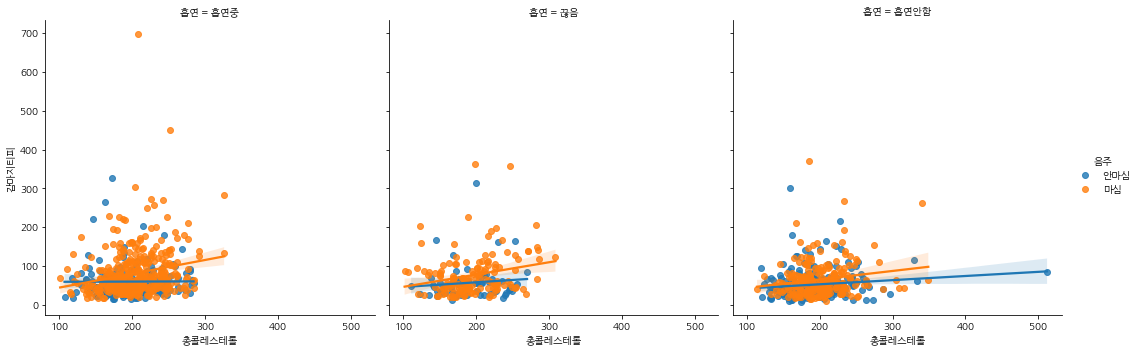

In [118]:
sns.lmplot(data=df_fat, x="총콜레스테롤", y="감마지티피", hue="음주", col="흡연")

**시각화 결과로는 흡연 경험의 유무보다는 음주를 할 수록 감마지티피와 총콜레스테롤 수치가 대체적으로 높은 것을 알 수 있다.**

# Q5. 
**연령대별로 시력은 얼마나 차이가 날까요? 연령대, 성별 좌우 평균 시력을 시각화 해주세요!**
* 시력은 0.1~2.5 사이의 값으로 표기하며 0.1 이하의 시력은 0.1, 실명은 9.9로 표기합니다.

* 실명인 데이터를 평균에 포함하게 되면 시력에 대한 평균을 제대로 구하기 어렵습니다. 실명 데이터를 제외하고 연령대, 성별에 따른 평균 좌우 시력을 구해주세요!

* 서브플롯으로 시각화하여 표현해 주고 matplotlib 에 대한 사용법은 다음의 영상도 함께 참고해 주세요! (https://www.youtube.com/watch?v=ZTRKojTLE8M)

* 시각화 예시는 참고사항으로 스타일이나 폰트 구성이 달라도 연령대, 성별 좌우평균시력을 시각화 하면 됩니다.



**예상: 연령대가 높아질수록 시력은 낮아질 것으로 예상한다. 성별은 큰 차이 없을 것 같다.**

데이터 결측치를 살펴보자

In [137]:
df_de.isna().sum()

기준년도                 0
가입자일련번호              0
성별코드                 0
연령대코드(5세단위)          0
시도코드                 0
신장(5Cm단위)          262
체중(5Kg 단위)         268
허리둘레               440
시력(좌)              288
시력(우)              279
청력(좌)              242
청력(우)              243
수축기혈압               76
이완기혈압               77
식전혈당(공복혈당)          43
총콜레스테롤              43
트리글리세라이드            43
HDL콜레스테롤            44
LDL콜레스테롤          2899
혈색소                 56
요단백               4859
혈청크레아티닌             44
(혈청지오티)AST          42
(혈청지오티)ALT          44
감마지티피               45
흡연상태               160
음주여부               525
구강검진 수검여부            0
치아우식증유무        1000000
흡연                 160
음주                 525
연령대                  0
dtype: int64

시력이 결측치인 데이터를 제거하자

In [138]:
df_eye = df_de.dropna(subset = ['시력(좌)', '시력(우)'])
df_eye.isna().sum()

기준년도                0
가입자일련번호             0
성별코드                0
연령대코드(5세단위)         0
시도코드                0
신장(5Cm단위)         179
체중(5Kg 단위)        185
허리둘레              339
시력(좌)               0
시력(우)               0
청력(좌)             102
청력(우)             102
수축기혈압              22
이완기혈압              23
식전혈당(공복혈당)         40
총콜레스테롤             40
트리글리세라이드           40
HDL콜레스테롤           41
LDL콜레스테롤         2895
혈색소                52
요단백              4794
혈청크레아티닌            41
(혈청지오티)AST         39
(혈청지오티)ALT         41
감마지티피              42
흡연상태              160
음주여부              525
구강검진 수검여부           0
치아우식증유무        999698
흡연                160
음주                525
연령대                 0
dtype: int64

연령에 따라 정렬하자

In [154]:
df_eye = df_eye.sort_values('연령대코드(5세단위)')
df_eye.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,흡연,음주,연령대
545648,2017,545649,2,5,27,160.0,65.0,73.0,1.0,0.8,...,17.0,7.0,17.0,1.0,0.0,0,NaN,흡연안함,안마심,15~19세
695844,2017,695845,1,5,11,160.0,75.0,81.2,9.9,9.9,...,53.0,100.0,40.0,1.0,0.0,1,NaN,흡연안함,안마심,15~19세
220930,2017,220931,1,5,26,165.0,55.0,71.1,1.2,1.2,...,40.0,10.0,30.0,3.0,1.0,1,NaN,흡연중,마심,15~19세
467260,2017,467261,2,5,28,165.0,65.0,78.0,1.0,1.0,...,20.0,21.0,10.0,1.0,0.0,1,NaN,흡연안함,안마심,15~19세
164012,2017,164013,2,5,44,160.0,55.0,72.0,1.2,1.0,...,33.0,42.0,9.0,1.0,0.0,1,NaN,흡연안함,안마심,15~19세


seaborn의 barplot으로 시각화하자

In [155]:
# 그래프를 여러개 그려야한다. matplotlib을 임포트 하자.
import matplotlib.pyplot as plt

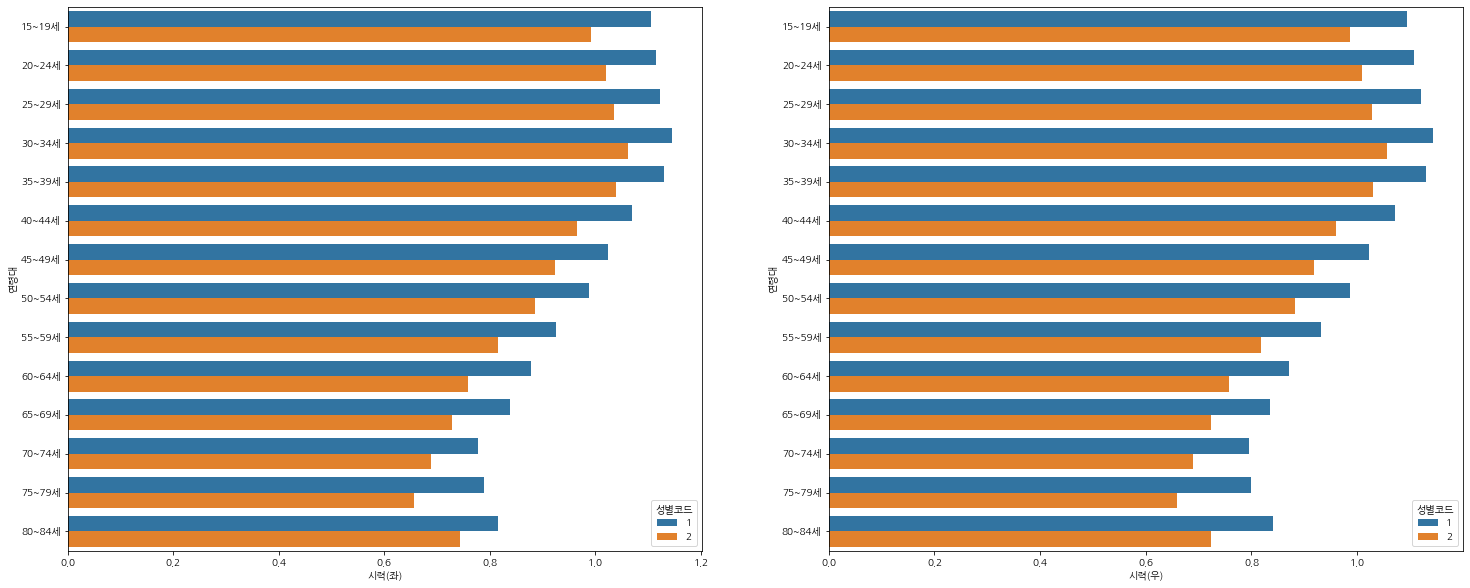

In [156]:
# 그래프 객체를 생성하기 위한 피겨 객체 얻어오기
fig = plt.figure(figsize=(25, 10))

# 하나의 fig(도화지라고 생각하면 됨)에 2가지 그래프를 그리는 방법이다.
# subplot이라고 생각하면 된다.
area1 = fig.add_subplot(1, 2, 1)
area2 = fig.add_subplot(1, 2, 2)

# 연령대, 성별 좌우평균시력
sns.barplot(data=df_eye, x="시력(좌)", y="연령대", hue="성별코드", ax=area1, ci=None)
sns.barplot(data=df_eye, x="시력(우)", y="연령대", hue="성별코드", ax=area2, ci=None)

plt.show()

**가장 놀라웠던 부분은 남성의 시력이 여성보다 모든 연령대에서 좋다는 것이었다. 예상치 못한 흥미로운 결과다.  
또한 나이가 들수록 계속해서 시력이 낮아질 줄 알았는데 30대 초반에 가장 좋은 것이 의외였다. 마지막에 70대 초반보다 80대 초반이 더 좋아지는 것도 신기하다.**